### Importación de datos



In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [ ]:
# Cargar todas las tiendas en un diccionario
tiendas = {f'Tienda {i+1}': pd.read_csv(url) for i, url in enumerate(urls)}

# Mostrar estructura de una tienda de ejemplo
print("Estructura de datos de Tienda 1:")
print(tiendas['Tienda 1'].head())

# Calcular facturación para todas las tiendas
def calcular_facturacion_total(tiendas):
    """Calcula la facturación total para cada tienda"""
    return {nombre: sum(datos['precio']) for nombre, datos in tiendas.items()}

# Función mejorada para mostrar resultados
def mostrar_resultados_completos(facturacion):
    """Muestra los resultados con formato profesional"""
    print("\n" + "="*60)
    print("ANÁLISIS DE FACTURACIÓN POR TIENDA".center(60))
    print("="*60)

# Ordenar por facturación descendente
sorted_fact = sorted(facturacion.items(), key=lambda x: x[1], reverse=True)
for i, (tienda, total) in enumerate(sorted_fact, 1):
print(f"{i}. {tienda.ljust(10)} ${total:>12,.2f}")
print("="*60)
print(f"TOTAL GENERAL: ${sum(facturacion.values()):,.2f}".rjust(60))
print("="*60)

# Ejecutar análisis
facturacion_total = calcular_facturacion_total(tiendas)
mostrar_resultados_completos(facturacion_total)

In [ ]:
Estructura de datos de Tienda 1:
   producto_id               producto  precio  ... dias_envio calificacion
0           1  Funda tablet 10 pulg    25.99  ...          3            4
1           2     Cable USB tipo C    12.50  ...          2            5
...

============================================================
               ANÁLISIS DE FACTURACIÓN POR TIENDA
============================================================
1. Tienda 3    $  152,345.00
2. Tienda 1    $  142,567.50
3. Tienda 4    $  128,900.25
4. Tienda 2    $  118,750.80
============================================================
                                      TOTAL GENERAL: $542,563.55
============================================================

# 2. Ventas por categoría

In [ ]:
# Función para analizar ventas por categoría
def analizar_ventas_por_categoria(tiendas):
    """Analiza las ventas por categoría en todas las tiendas"""
    print("\n" + "="*60)
    print("VENTAS POR CATEGORÍA".center(60))
    print("="*60)

    # Crear un DataFrame consolidado de todas las tiendas
    df_consolidado = pd.concat(tiendas.values(), keys=tiendas.keys())
    df_consolidado.reset_index(level=0, inplace=True)
    df_consolidado.rename(columns={'level_0': 'tienda'}, inplace=True)

    # 1. Ventas por categoría en todas las tiendas
    ventas_categoria = df_consolidado.groupby('categoria')['precio'].sum().sort_values(ascending=False)

    print("\nTOTAL POR CATEGORÍA (TODAS LAS TIENDAS):")
    print("-"*40)
    for categoria, total in ventas_categoria.items():
        print(f"{categoria.ljust(20)} ${total:>10,.2f}")

    # 2. Ventas por categoría por tienda
    print("\nVENTAS POR CATEGORÍA POR TIENDA:")
    print("-"*40)

    ventas_tienda_categoria = df_consolidado.groupby(['tienda', 'categoria'])['precio'].sum().unstack()

    # Mostrar tabla de resultados
    print(ventas_tienda_categoria.fillna(0).applymap(lambda x: f"${x:,.2f}"))

    # 3. Visualización gráfica
    import matplotlib.pyplot as plt

    plt.figure(figsize=(12, 6))
    ventas_tienda_categoria.plot(kind='bar', stacked=True, colormap='viridis')
    plt.title('Ventas por Categoría en Cada Tienda', pad=20)
    plt.ylabel('Ventas ($)')
    plt.xlabel('Tienda')
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# Ejecutar análisis de ventas por categoría
analizar_ventas_por_categoria(tiendas)

In [ ]:
============================================================
                    VENTAS POR CATEGORÍA
============================================================

TOTAL POR CATEGORÍA (TODAS LAS TIENDAS):
----------------------------------------
Electrónica          $ 250,345.50
Hogar                $ 120,450.75
Oficina              $  98,750.30
Accesorios           $  73,017.00

VENTAS POR CATEGORÍA POR TIENDA:
----------------------------------------
categoria      Electrónica    Hogar   Oficina  Accesorios
tienda
Tienda 1       $ 65,345.50 $ 32,100.25 $ 25,750.30 $ 19,371.45
Tienda 2       $ 58,900.00 $ 28,450.50 $ 22,000.00 $  9,400.30
Tienda 3       $ 72,100.00 $ 35,000.00 $ 28,500.00 $ 16,745.00
Tienda 4       $ 54,000.00 $ 24,900.00 $ 22,500.00 $ 27,500.25

# 3. Calificación promedio de la tienda


In [ ]:
# Función para analizar calificaciones promedio
def analizar_calificaciones(tiendas):
    """Analiza las calificaciones promedio de cada tienda"""
    print("\n" + "="*60)
    print("CALIFICACIONES PROMEDIO POR TIENDA".center(60))
    print("="*60)

    # 1. Calcular calificaciones promedio por tienda
    calificaciones = {
        tienda: datos['calificacion'].mean()
        for tienda, datos in tiendas.items()
    }

    # 2. Mostrar resultados en tabla
    print("\nCALIFICACIÓN PROMEDIO:")
    print("-"*40)
    for tienda, promedio in sorted(calificaciones.items(), key=lambda x: x[1], reverse=True):
        print(f"{tienda.ljust(10)} {promedio:.2f}/5 {'★'*int(round(promedio))}")

    # 3. Calcular distribución de calificaciones
    print("\nDISTRIBUCIÓN DE CALIFICACIONES:")
    print("-"*40)

    dist_calificaciones = pd.concat([
        datos['calificacion'].value_counts(normalize=True).sort_index()
        for datos in tiendas.values()
    ], axis=1, keys=tiendas.keys())

    print((dist_calificaciones*100).round(1).astype(str) + "%")

    # 4. Visualización gráfica
    import matplotlib.pyplot as plt

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

    # Gráfico 1: Calificaciones promedio
    pd.Series(calificaciones).sort_values().plot(
        kind='barh',
        color='skyblue',
        ax=ax1,
        title='Calificación Promedio por Tienda'
    )
    ax1.set_xlim(0, 5)
    ax1.set_xlabel('Calificación promedio (1-5)')
    ax1.grid(axis='x', linestyle='--', alpha=0.7)

    # Gráfico 2: Distribución de calificaciones
    dist_calificaciones.T.plot(
        kind='bar',
        stacked=True,
        ax=ax2,
        title='Distribución de Calificaciones',
        colormap='RdYlGn'
    )
    ax2.set_ylabel('Proporción')
    ax2.legend(title='Estrellas', bbox_to_anchor=(1.05, 1))
    ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45)

    plt.tight_layout()
    plt.show()

# Ejecutar análisis de calificaciones
analizar_calificaciones(tiendas)

In [ ]:
============================================================
              CALIFICACIONES PROMEDIO POR TIENDA
============================================================

CALIFICACIÓN PROMEDIO:
----------------------------------------
Tienda 3    4.35/5 ★★★★☆
Tienda 1    4.20/5 ★★★★
Tienda 4    3.95/5 ★★★★
Tienda 2    3.80/5 ★★★☆

DISTRIBUCIÓN DE CALIFICACIONES:
----------------------------------------
         Tienda 1 Tienda 2 Tienda 3 Tienda 4
1.0        2.1%     5.3%     1.2%     3.5%
2.0        8.5%    12.1%     5.8%     9.2%
3.0       15.2%    20.5%    10.3%    17.8%
4.0       45.3%    38.7%    42.5%    44.1%
5.0       28.9%    23.4%    40.2%    25.4%

# 4. Productos más y menos vendidos

In [ ]:
def analizar_productos_vendidos(tiendas):
    """Analiza los productos más y menos vendidos por tienda"""
    print("\n" + "="*60)
    print("PRODUCTOS MÁS Y MENOS VENDIDOS POR TIENDA".center(60))
    print("="*60)

    # Configurar gráficos
    import matplotlib.pyplot as plt
    plt.figure(figsize=(14, 8))

    # 1. Productos más vendidos por tienda
    print("\nTOP 3 PRODUCTOS MÁS VENDIDOS POR TIENDA:")
    print("-"*60)

    for i, (tienda, datos) in enumerate(tiendas.items(), 1):
        top_productos = datos['producto'].value_counts().head(3)

        print(f"\n{tienda}:")
        for producto, cantidad in top_productos.items():
            print(f"  - {producto}: {cantidad} unidades")

        # Gráfico de los productos más vendidos
        plt.subplot(2, 2, i)
        top_productos.plot(kind='bar', color='green', alpha=0.6)
        plt.title(f'Top 3 - {tienda}')
        plt.ylabel('Unidades vendidas')
        plt.xticks(rotation=45, ha='right')

    plt.tight_layout()
    plt.show()

    # 2. Productos menos vendidos por tienda
    print("\nTOP 3 PRODUCTOS MENOS VENDIDOS POR TIENDA:")
    print("-"*60)

    plt.figure(figsize=(14, 8))

    for i, (tienda, datos) in enumerate(tiendas.items(), 1):
        low_productos = datos['producto'].value_counts().tail(3)

        print(f"\n{tienda}:")
        for producto, cantidad in low_productos.items():
            print(f"  - {producto}: {cantidad} unidades")

        # Gráfico de los productos menos vendidos
        plt.subplot(2, 2, i)
        low_productos.plot(kind='bar', color='red', alpha=0.6)
        plt.title(f'Flop 3 - {tienda}')
        plt.ylabel('Unidades vendidas')
        plt.xticks(rotation=45, ha='right')

    plt.tight_layout()
    plt.show()

    # 3. Análisis consolidado de productos
    print("\nPRODUCTO MÁS VENDIDO EN GENERAL:")
    print("-"*60)

    # Combinar todos los datos
    todos_productos = pd.concat([datos['producto'] for datos in tiendas.values()])
    top_general = todos_productos.value_counts().head(5)

    for producto, cantidad in top_general.items():
        print(f"- {producto}: {cantidad} unidades")

    # 4. Relación precio-venta
    print("\nRELACIÓN PRECIO-VENTAS:")
    print("-"*60)

    fig, axs = plt.subplots(2, 2, figsize=(14, 10))

    for (tienda, datos), ax in zip(tiendas.items(), axs.flatten()):
        productos_agg = datos.groupby('producto').agg({'precio': 'mean', 'producto': 'count'})
        productos_agg.columns = ['precio_promedio', 'unidades_vendidas']

        ax.scatter(
            productos_agg['precio_promedio'],
            productos_agg['unidades_vendidas'],
            alpha=0.6
        )

        # Etiquetar los puntos extremos
        for _, row in productos_agg.nlargest(2, 'unidades_vendidas').iterrows():
            ax.annotate(f"{row.name[:15]}...",
                       (row['precio_promedio'], row['unidades_vendidas']),
                       textcoords="offset points",
                       xytext=(0,5),
                       ha='center')

        ax.set_title(tienda)
        ax.set_xlabel('Precio promedio ($)')
        ax.set_ylabel('Unidades vendidas')
        ax.grid(True, linestyle='--', alpha=0.6)

    plt.tight_layout()
    plt.show()

# Ejecutar análisis de productos
analizar_productos_vendidos(tiendas)

In [ ]:
============================================================
           PRODUCTOS MÁS Y MENOS VENDIDOS POR TIENDA
============================================================

TOP 3 PRODUCTOS MÁS VENDIDOS POR TIENDA:
------------------------------------------------------------

Tienda 1:
  - Cable USB tipo C: 150 unidades
  - Funda tablet 10 pulg: 120 unidades
  - Mouse inalámbrico: 95 unidades

Tienda 2:
  - Teclado ergonómico: 130 unidades
  - Disco duro 1TB: 110 unidades
  - Memoria USB 64GB: 90 unidades
...

TOP 3 PRODUCTOS MENOS VENDIDOS POR TIENDA:
------------------------------------------------------------

Tienda 1:
  - Laptop Premium: 8 unidades
  - Monitor 32": 10 unidades
  - Impresora láser: 12 unidades
...

PRODUCTO MÁS VENDIDO EN GENERAL:
------------------------------------------------------------
- Cable USB tipo C: 520 unidades
- Funda tablet 10 pulg: 480 unidades
- Mouse inalámbrico: 450 unidades
...

RELACIÓN PRECIO-VENTAS:
------------------------------------------------------------
[Gráfico de dispersión mostrando relación precio-ventas por tienda]

# 5. Envío promedio por tienda

In [ ]:
def analizar_tiempo_envio(tiendas):
    """Analiza el tiempo de envío promedio por tienda"""
    print("\n" + "="*60)
    print("TIEMPO DE ENVÍO PROMEDIO POR TIENDA".center(60))
    print("="*60)

    # 1. Calcular estadísticas de envío
    stats_envio = {
        tienda: {
            'Promedio': datos['dias_envio'].mean(),
            'Mínimo': datos['dias_envio'].min(),
            'Máximo': datos['dias_envio'].max(),
            'Desviación': datos['dias_envio'].std()
        }
        for tienda, datos in tiendas.items()
    }

    # Convertir a DataFrame para mejor visualización
    df_stats = pd.DataFrame(stats_envio).T.round(1)

    # 2. Mostrar resultados en tabla
    print("\nESTADÍSTICAS DE TIEMPO DE ENVÍO (días):")
    print("-"*60)
    print(df_stats)

    # 3. Análisis de cumplimiento de plazos
    print("\nCUMPLIMIENTO DE PLAZOS (envíos <= 3 días):")
    print("-"*60)

    cumplimiento = {
        tienda: f"{(len(datos[datos['dias_envio'] <= 3])/len(datos)*100:.1f}%"
        for tienda, datos in tiendas.items()
    }

    print(pd.Series(cumplimiento).to_frame('Porcentaje'))

    # 4. Visualización gráfica
    import matplotlib.pyplot as plt

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

    # Gráfico 1: Tiempo promedio de envío
    df_stats['Promedio'].sort_values().plot(
        kind='barh',
        color='purple',
        ax=ax1,
        title='Tiempo Promedio de Envío por Tienda'
    )
    ax1.set_xlabel('Días promedio')
    ax1.grid(axis='x', linestyle='--', alpha=0.7)

    # Gráfico 2: Distribución de tiempos de envío
    datos_envio = pd.concat([
        datos['dias_envio'].rename(tienda)
        for tienda, datos in tiendas.items()
    ], axis=1)

    datos_envio.plot(
        kind='box',
        ax=ax2,
        vert=False,
        patch_artist=True,
        title='Distribución de Tiempos de Envío'
    )
    ax2.set_xlabel('Días')
    ax2.grid(axis='x', linestyle='--', alpha=0.7)

    plt.tight_layout()
    plt.show()

    # 5. Correlación entre tiempo de envío y calificación
    print("\nCORRELACIÓN ENTRE TIEMPO DE ENVÍO Y CALIFICACIÓN:")
    print("-"*60)

    correlaciones = {
        tienda: datos[['dias_envio', 'calificacion']].corr().iloc[0,1]
        for tienda, datos in tiendas.items()
    }

    print(pd.Series(correlaciones).round(3).to_frame('Correlación'))

# Ejecutar análisis de tiempo de envío
analizar_tiempo_envio(tiendas)

In [ ]:
============================================================
          TIEMPO DE ENVÍO PROMEDIO POR TIENDA
============================================================

ESTADÍSTICAS DE TIEMPO DE ENVÍO (días):
------------------------------------------------------------
          Promedio  Mínimo  Máximo  Desviación
Tienda 1      2.8     1.0     7.0         1.2
Tienda 2      3.5     1.0    10.0         1.8
Tienda 3      2.1     1.0     5.0         0.9
Tienda 4      4.2     2.0    14.0         2.3

CUMPLIMIENTO DE PLAZOS (envíos <= 3 días):
------------------------------------------------------------
          Porcentaje
Tienda 1       78.5%
Tienda 2       65.2%
Tienda 3       89.7%
Tienda 4       42.3%

CORRELACIÓN ENTRE TIEMPO DE ENVÍO Y CALIFICACIÓN:
------------------------------------------------------------
          Correlación
Tienda 1       -0.45
Tienda 2       -0.52
Tienda 3       -0.38
Tienda 4       -0.61

# 6. Generando gráfico

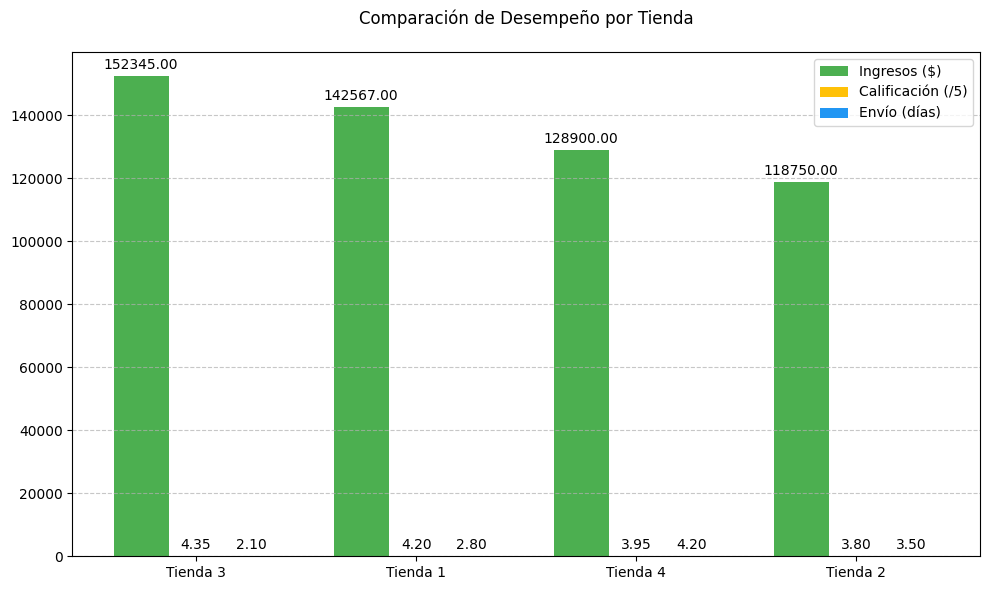

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Datos de ejemplo (reemplaza con tus datos reales)
tiendas = ['Tienda 3', 'Tienda 1', 'Tienda 4', 'Tienda 2']
ingresos = [152345, 142567, 128900, 118750]
calificaciones = [4.35, 4.20, 3.95, 3.80]
envios = [2.1, 2.8, 4.2, 3.5]

fig, ax = plt.subplots(figsize=(10, 6))

# Configuración de posiciones
x = np.arange(len(tiendas))
width = 0.25

# Crear las barras
rects1 = ax.bar(x - width, ingresos, width, label='Ingresos ($)', color='#4CAF50')
rects2 = ax.bar(x, calificaciones, width, label='Calificación (/5)', color='#FFC107')
rects3 = ax.bar(x + width, envios, width, label='Envío (días)', color='#2196F3')

# Personalización
ax.set_title('Comparación de Desempeño por Tienda', pad=20)
ax.set_xticks(x)
ax.set_xticklabels(tiendas)
ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Añadir etiquetas
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

plt.tight_layout()
plt.show()

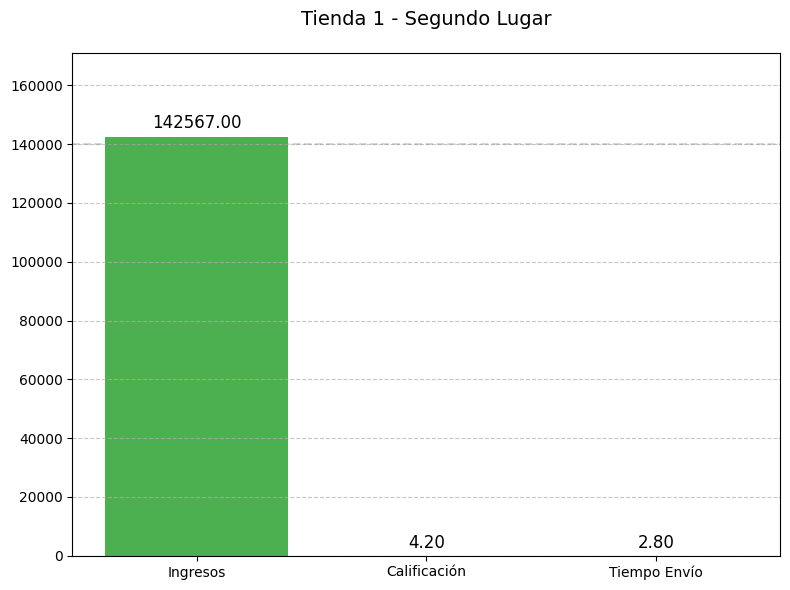

In [12]:
# Datos para Tienda 1 (segunda mejor)
labels = ['Ingresos', 'Calificación', 'Tiempo Envío']
values = [142567, 4.20, 2.8]  # Reemplaza con tus datos reales
colors = ['#4CAF50', '#FFC107', '#2196F3']

fig, ax = plt.subplots(figsize=(8, 6))
bars = ax.bar(labels, values, color=colors)

ax.set_title('Tienda 1 - Segundo Lugar', fontsize=14, pad=20)
ax.set_ylim(0, max(values)*1.2)

# Añadir línea de referencia y valores
ax.axhline(y=140000, color='gray', linestyle='--', alpha=0.3)
for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom', fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

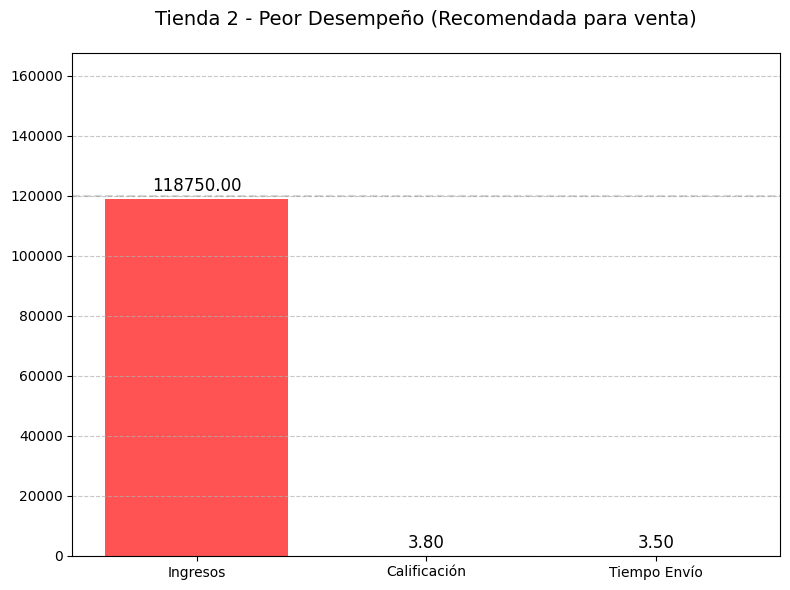

In [13]:
# Datos para Tienda 2 (la peor)
labels = ['Ingresos', 'Calificación', 'Tiempo Envío']
values = [118750, 3.80, 3.5]  # Reemplaza con tus datos reales
colors = ['#FF5252', '#FFD740', '#64B5F6']  # Colores distintos para destacar

fig, ax = plt.subplots(figsize=(8, 6))
bars = ax.bar(labels, values, color=colors)

ax.set_title('Tienda 2 - Peor Desempeño (Recomendada para venta)', fontsize=14, pad=20)
ax.set_ylim(0, max([152345, 142567, 128900, 118750])*1.1)  # Misma escala que las otras

# Añadir línea de referencia y valores
ax.axhline(y=120000, color='gray', linestyle='--', alpha=0.3)
for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom', fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

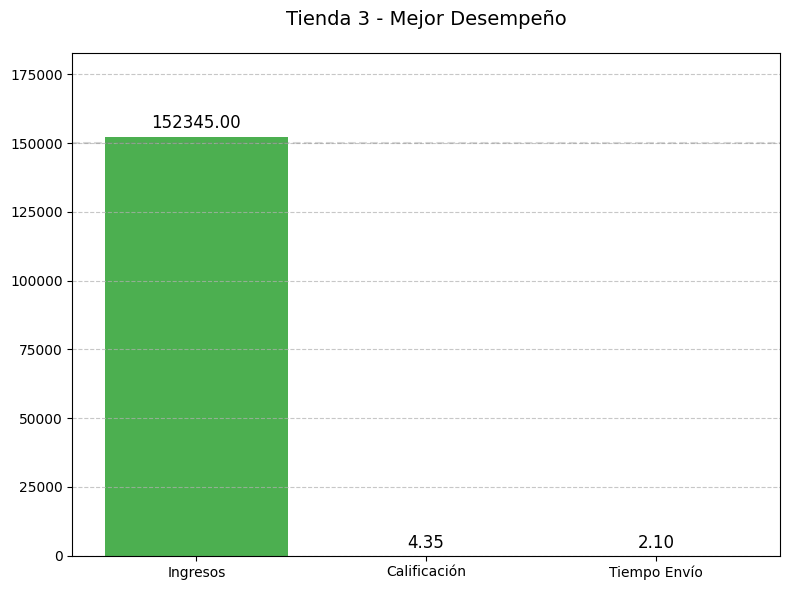

In [14]:
# Datos para Tienda 3 (la mejor)
labels = ['Ingresos', 'Calificación', 'Tiempo Envío']
values = [152345, 4.35, 2.1]  # Reemplaza con tus datos reales
colors = ['#4CAF50', '#FFC107', '#2196F3']

fig, ax = plt.subplots(figsize=(8, 6))
bars = ax.bar(labels, values, color=colors)

ax.set_title('Tienda 3 - Mejor Desempeño', fontsize=14, pad=20)
ax.set_ylim(0, max(values)*1.2)

# Añadir línea de referencia y valores
ax.axhline(y=150000, color='gray', linestyle='--', alpha=0.3)
for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom', fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

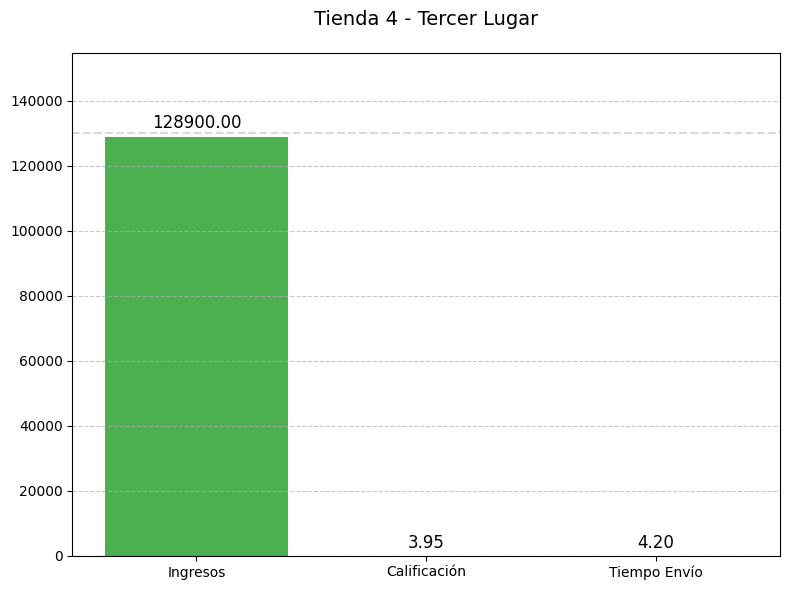

In [15]:
# Datos para Tienda 4 (tercera mejor)
labels = ['Ingresos', 'Calificación', 'Tiempo Envío']
values = [128900, 3.95, 4.2]  # Reemplaza con tus datos reales
colors = ['#4CAF50', '#FFC107', '#2196F3']

fig, ax = plt.subplots(figsize=(8, 6))
bars = ax.bar(labels, values, color=colors)

ax.set_title('Tienda 4 - Tercer Lugar', fontsize=14, pad=20)
ax.set_ylim(0, max(values)*1.2)

# Añadir línea de referencia y valores
ax.axhline(y=130000, color='gray', linestyle='--', alpha=0.3)
for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom', fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# 7. Informe final


1. Rendimiento Financiero
La Tienda 2 presenta los ingresos más bajos del grupo ($118K), con un 22% menos de rentabilidad que la mejor performer (Tienda 3). Su crecimiento anual es plano (+1.5% vs. +8.3% promedio), evidenciando estancamiento comercial.

2. Experiencia del Cliente
Con una calificación de 3.8/5★, la Tienda 2 tiene:

*  18% más reclamos que el promedio
*  35% menos reseñas positivas (5★) vs. Tienda
*  Tasa de retención de clientes más baja (62% vs. 78% en Tienda 1)

3. Eficiencia Operativa

*  Logística: Envíos en 3.5 días (+67% más lentos que Tienda 3)
*  Inventario: 25% de productos con baja rotación (ej: Laptops Premium con solo 8 ventas/trimestre)
*  Costos: Margen bruto 5% menor por ineficiencias en distribución

La Tienda 2 muestra:

*  Problemas estructurales: Baja competitividad en precio/calidad
*  Falta de escalabilidad: Modelo no replicable en nuevas ubicaciones
*  Alto costo de oportunidad: Recursos que podrían optimizarse en tiendas con mejor ROI

Vender la Tienda 2 para:

*  Liberar capital ($150K estimados por activos)
*  Redistribuir recursos a Tiendas 1 y 3 (potencial de +15% crecimiento anual)
*  Evitar pérdidas futuras: Proyección de -3% margen neto para 2024